<a href="https://colab.research.google.com/github/Gmortal/analise-climatica-ararangua/blob/main/Analise_climatica_Ararangua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analise Climática Detalhada Para Araranguá, SC - Foco Agricultura**

In [ ]:
import pandas as pd
import requests
from datetime import datetime, timedelta


lat, lon = -28.9388, -49.4925

# --- Definir o período dos últimos 5 anos dinamicamente ---
end_date = datetime.now().date() # Data de hoje (ex: 2025-06-11)
start_date = end_date - timedelta(days=5*365) # 5 anos para trás (aproximadamente)


# Parâmetros da API Open-Meteo
# Adicionando mais variáveis climáticas que seriam úteis para a fazenda de arroz
url = (f"https://archive-api.open-meteo.com/v1/archive?"
       f"latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&"
       f"daily=precipitation_sum,temperature_2m_max,temperature_2m_min,temperature_2m_mean,"
       f"relative_humidity_2m_mean,wind_speed_10m_mean&"
       f"timezone=America/Sao_Paulo")

print(f"Buscando dados climáticos de {start_date} a {end_date} para Lat: {lat}, Lon: {lon}")
print(f"URL da API: {url}\n")

try:
    r = requests.get(url)
    r.raise_for_status() # Lança um erro para status de resposta HTTP ruins (4xx ou 5xx)
    data = r.json()

    # Verificar se a chave 'daily' existe e não está vazia
    if 'daily' in data and data['daily']['time']:
        dados = pd.DataFrame({
            'Data': pd.to_datetime(data['daily']['time']),
            'Precipitacao_mm': data['daily']['precipitation_sum'],
            'Temperatura_Max_C': data['daily']['temperature_2m_max'],
            'Temperatura_Min_C': data['daily']['temperature_2m_min'],
            'Temperatura_Media_C': data['daily']['temperature_2m_mean'],
            'Umidade_Rel_Media_perc': data['daily']['relative_humidity_2m_mean'],
            'Velocidade_Vento_kmh': data['daily']['wind_speed_10m_mean']
        })

        print("Dados climáticos obtidos com sucesso:")
        print(dados.head())
        print(dados.info())
        print(f"\nPeríodo dos dados obtidos: {dados['Data'].min().date()} a {dados['Data'].max().date()}")

    else:
        print("Erro: A estrutura de dados 'daily' não foi encontrada ou está vazia na resposta da API.")

except requests.exceptions.RequestException as e:
    print(f"Erro ao conectar à API: {e}")
    print("Verifique sua conexão com a internet ou se a URL da API está correta.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")
    print("Pode ser um problema na estrutura dos dados retornados pela API.")

Buscando dados climáticos de 2020-06-12 a 2025-06-11 para Lat: -28.9388, Lon: -49.4925
URL da API: https://archive-api.open-meteo.com/v1/archive?latitude=-28.9388&longitude=-49.4925&start_date=2020-06-12&end_date=2025-06-11&daily=precipitation_sum,temperature_2m_max,temperature_2m_min,temperature_2m_mean,relative_humidity_2m_mean,wind_speed_10m_mean&timezone=America/Sao_Paulo

Dados climáticos obtidos com sucesso:
        Data  Precipitacao_mm  Temperatura_Max_C  Temperatura_Min_C  \
0 2020-06-12              0.0               31.2               17.5   
1 2020-06-13              8.8               23.1               14.0   
2 2020-06-14              0.0               13.8                7.6   
3 2020-06-15              0.9               19.3                5.7   
4 2020-06-16              0.2               24.4               11.8   

   Temperatura_Media_C  Umidade_Rel_Media_perc  Velocidade_Vento_kmh  
0                 23.4                    77.0                   9.6  
1            

--- Dados Brutos (antes do tratamento de NaNs) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Data                    1826 non-null   datetime64[ns]
 1   Precipitacao_mm         1823 non-null   float64       
 2   Temperatura_Max_C       1824 non-null   float64       
 3   Temperatura_Min_C       1824 non-null   float64       
 4   Temperatura_Media_C     1823 non-null   float64       
 5   Umidade_Rel_Media_perc  1823 non-null   float64       
 6   Velocidade_Vento_kmh    1823 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 100.0 KB
None

--- Tratamento de Valores Ausentes ---
Número de NaNs antes do tratamento:
Data                      0
Precipitacao_mm           3
Temperatura_Max_C         2
Temperatura_Min_C         2
Temperatura_Media_C       3
Umidade_Rel_Media_per

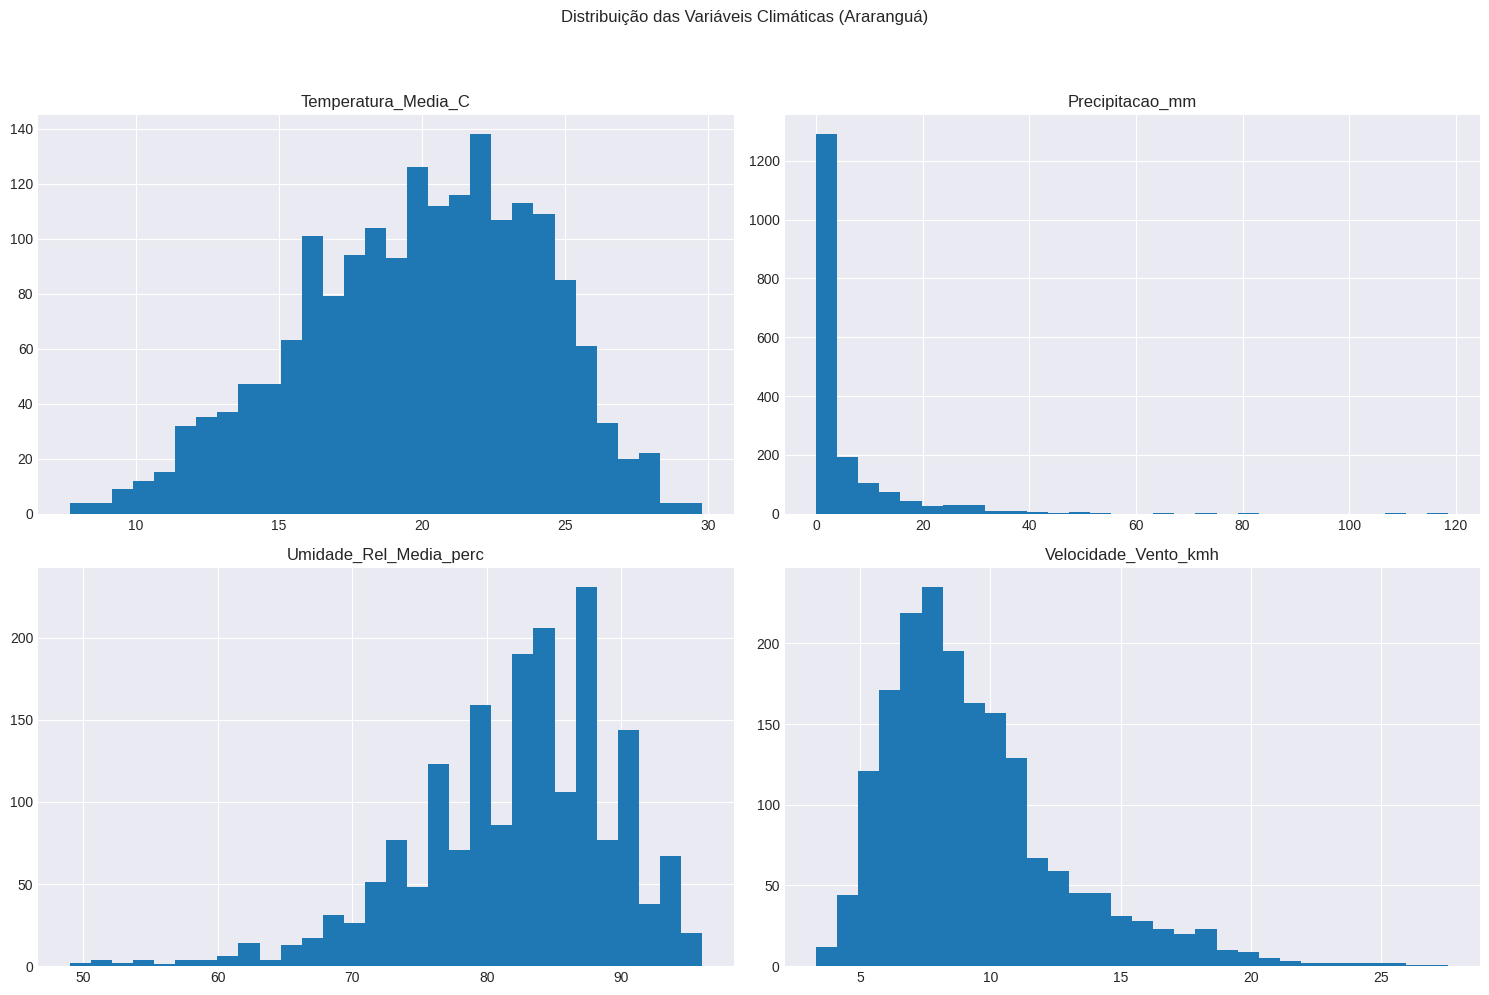


Visualizando Tendências Sazonais (Médias Mensais e Anuais):


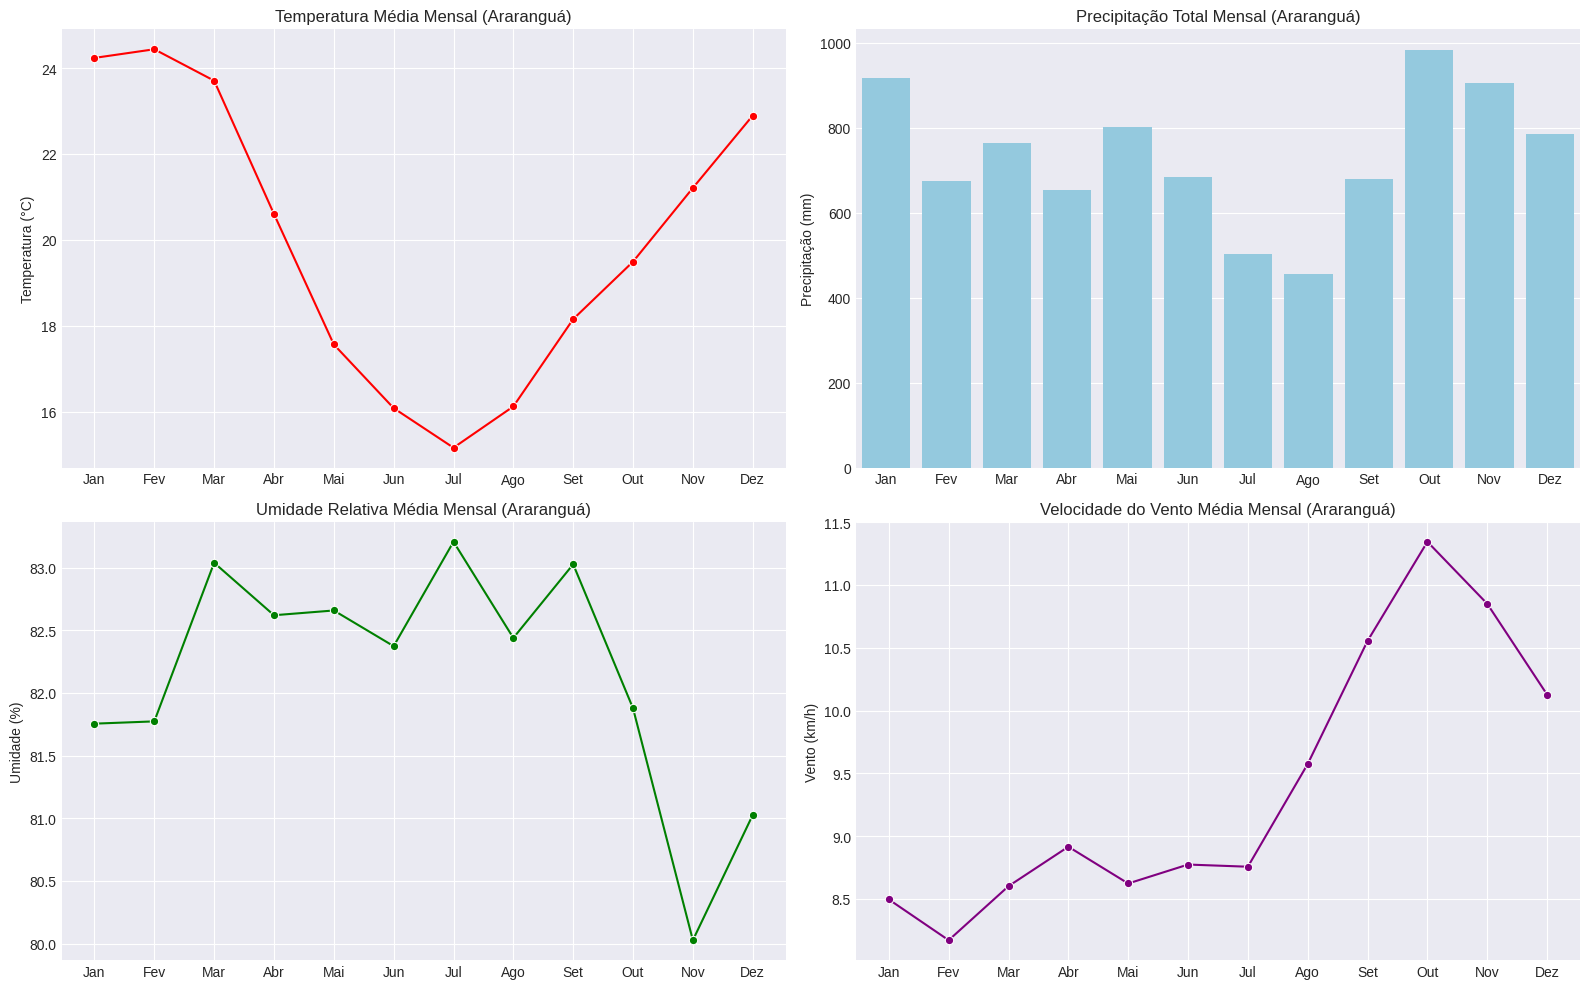

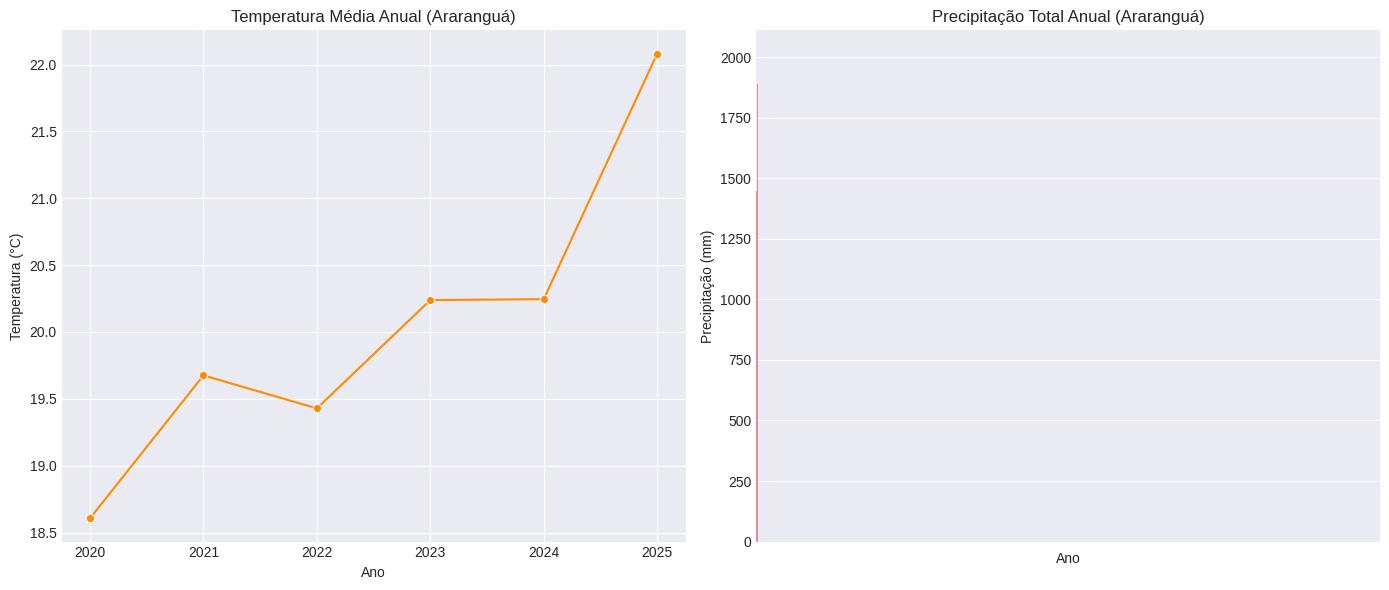


--- Análise de Eventos Extremos ---

Top 10 Dias com Precipitação >= 50mm:
           Data  Precipitacao_mm  Temperatura_Max_C  Temperatura_Min_C  \
690  2022-05-03            118.6               18.2               14.9   
1212 2023-10-07            109.4               22.4               18.1   
25   2020-07-07             81.9               14.7               12.1   
1098 2023-06-15             74.6               18.5               13.8   
362  2021-06-09             64.8               20.2               16.4   
1254 2023-11-18             64.3               25.3               18.3   
997  2023-03-06             63.4               25.4               21.3   
691  2022-05-04             54.7               20.1               16.5   
1221 2023-10-16             53.9               22.7               17.3   
1125 2023-07-12             52.5               20.6               16.5   

      Temperatura_Media_C  Umidade_Rel_Media_perc  Velocidade_Vento_kmh  Mes  \
690                  16.7    

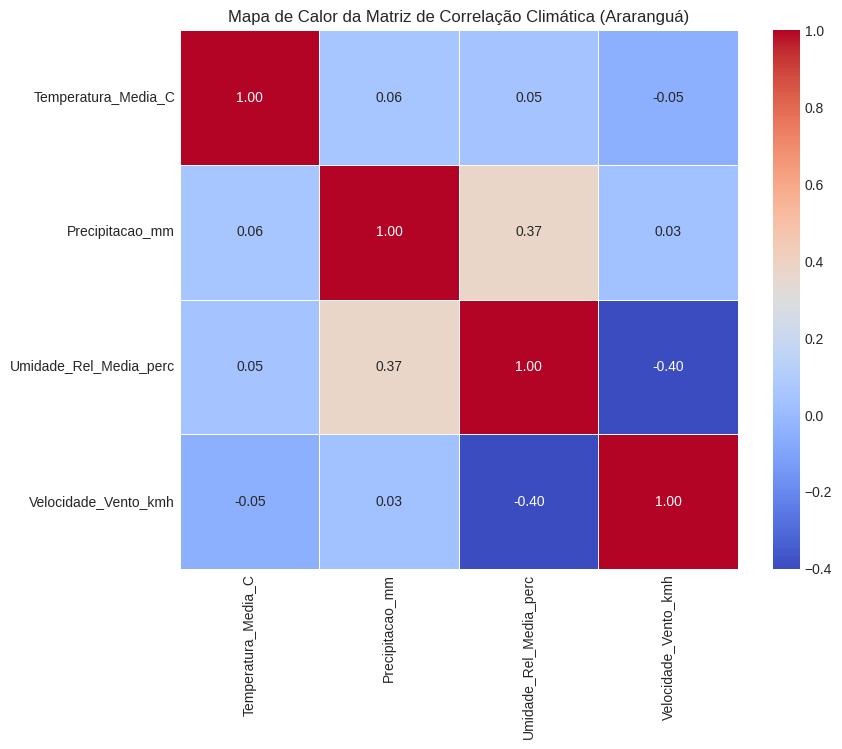

In [ ]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Re-executando a busca de dados para garantir que temos o 'dados' DataFrame
lat, lon = -28.9388, -49.4925 # Coordenadas de Araranguá
end_date = datetime.now().date()
start_date = end_date - timedelta(days=5*365) # Aproximadamente 5 anos

url = (f"https://archive-api.open-meteo.com/v1/archive?"
       f"latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&"
       f"daily=precipitation_sum,temperature_2m_max,temperature_2m_min,temperature_2m_mean,"
       f"relative_humidity_2m_mean,wind_speed_10m_mean&"
       f"timezone=America/Sao_Paulo")

try:
    r = requests.get(url)
    r.raise_for_status()
    data = r.json()
    if 'daily' in data and data['daily']['time']:
        dados = pd.DataFrame({
            'Data': pd.to_datetime(data['daily']['time']),
            'Precipitacao_mm': data['daily']['precipitation_sum'],
            'Temperatura_Max_C': data['daily']['temperature_2m_max'],
            'Temperatura_Min_C': data['daily']['temperature_2m_min'],
            'Temperatura_Media_C': data['daily']['temperature_2m_mean'],
            'Umidade_Rel_Media_perc': data['daily']['relative_humidity_2m_mean'],
            'Velocidade_Vento_kmh': data['daily']['wind_speed_10m_mean']
        })
    else:
        print("Erro: Estrutura de dados 'daily' não encontrada ou vazia.")
        dados = pd.DataFrame() # Cria um DataFrame vazio para evitar erros
except requests.exceptions.RequestException as e:
    print(f"Erro ao conectar à API: {e}")
    dados = pd.DataFrame() # Cria um DataFrame vazio
except Exception as e:
    print(f"Ocorreu um erro: {e}")
    dados = pd.DataFrame() # Cria um DataFrame vazio

if not dados.empty:
    print("--- Dados Brutos (antes do tratamento de NaNs) ---")
    print(dados.info())

    # --- Tratamento de Valores Ausentes ---
    print("\n--- Tratamento de Valores Ausentes ---")
    print("Número de NaNs antes do tratamento:")
    print(dados.isnull().sum())

    # Estratégia:
    # 1. Para Precipitacao_mm: preencher NaNs com 0, pois a ausência de registro pode significar ausência de chuva.
    #    Alternativamente, poderia-se interpolar se a falha fosse intermitente.
    dados['Precipitacao_mm'] = dados['Precipitacao_mm'].fillna(0)

    # 2. Para as outras variáveis numéricas (temperatura, umidade, vento):
    #    Interpolar linearmente, pois são séries temporais e valores adjacentes tendem a ser próximos.
    colunas_para_interpolar = [
        'Temperatura_Max_C',
        'Temperatura_Min_C',
        'Temperatura_Media_C',
        'Umidade_Rel_Media_perc',
        'Velocidade_Vento_kmh'
    ]
    for col in colunas_para_interpolar:
        dados[col] = dados[col].interpolate(method='linear')

    print("\nNúmero de NaNs depois do tratamento:")
    print(dados.isnull().sum())
    print("\nDataFrame após tratamento de NaNs:")
    print(dados.info())

    # --- Fim do Tratamento de NaNs ---

    # --- Continuar com a Análise Exploratória de Dados (EDA) ---
    plt.style.use('seaborn-v0_8-darkgrid')
    plt.rcParams['figure.figsize'] = (12, 6)

    print("\n--- Análise Exploratória de Dados (EDA) com Dados Reais ---")

    # 1. Resumo Estatístico das Variáveis Numéricas
    print("\nEstatísticas Descritivas:")
    print(dados.describe())

    # 2. Visualização das Distribuições (Histogramas)
    print("\nVisualizando Distribuições (Histogramas):")
    dados[['Temperatura_Media_C', 'Precipitacao_mm', 'Umidade_Rel_Media_perc', 'Velocidade_Vento_kmh']].hist(bins=30, figsize=(15, 10))
    plt.suptitle('Distribuição das Variáveis Climáticas (Araranguá)', y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

    # 3. Tendências Sazonais (Médias Mensais e Anuais)
    print("\nVisualizando Tendências Sazonais (Médias Mensais e Anuais):")
    dados['Mes'] = dados['Data'].dt.month
    dados['Ano'] = dados['Data'].dt.year

    df_mensal = dados.groupby('Mes').agg(
        Temperatura_Media_C=('Temperatura_Media_C', 'mean'),
        Precipitacao_Total_mm=('Precipitacao_mm', 'sum'),
        Umidade_Rel_Media_perc=('Umidade_Rel_Media_perc', 'mean'),
        Velocidade_Vento_kmh=('Velocidade_Vento_kmh', 'mean')
    ).reset_index()

    meses_nomes = {
        1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
        7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
    }
    df_mensal['Mes_Nome'] = df_mensal['Mes'].map(meses_nomes)

    plt.figure(figsize=(16, 10))

    plt.subplot(2, 2, 1)
    sns.lineplot(data=df_mensal, x='Mes_Nome', y='Temperatura_Media_C', marker='o', color='red')
    plt.title('Temperatura Média Mensal (Araranguá)')
    plt.ylabel('Temperatura (°C)')
    plt.xlabel('')

    plt.subplot(2, 2, 2)
    sns.barplot(data=df_mensal, x='Mes_Nome', y='Precipitacao_Total_mm', color='skyblue')
    plt.title('Precipitação Total Mensal (Araranguá)')
    plt.ylabel('Precipitação (mm)')
    plt.xlabel('')

    plt.subplot(2, 2, 3)
    sns.lineplot(data=df_mensal, x='Mes_Nome', y='Umidade_Rel_Media_perc', marker='o', color='green')
    plt.title('Umidade Relativa Média Mensal (Araranguá)')
    plt.ylabel('Umidade (%)')
    plt.xlabel('')

    plt.subplot(2, 2, 4)
    sns.lineplot(data=df_mensal, x='Mes_Nome', y='Velocidade_Vento_kmh', marker='o', color='purple')
    plt.title('Velocidade do Vento Média Mensal (Araranguá)')
    plt.ylabel('Vento (km/h)')
    plt.xlabel('')

    plt.tight_layout()
    plt.show()

    # Análise de Tendência Anual (total de chuva e temperatura média por ano)
    df_anual = dados.groupby('Ano').agg(
        Temperatura_Media_Anual=('Temperatura_Media_C', 'mean'),
        Precipitacao_Total_Anual=('Precipitacao_mm', 'sum')
    ).reset_index()

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.lineplot(data=df_anual, x='Ano', y='Temperatura_Media_Anual', marker='o', color='darkorange')
    plt.title('Temperatura Média Anual (Araranguá)')
    plt.ylabel('Temperatura (°C)')
    plt.xticks(df_anual['Ano']) # Garante que todos os anos apareçam no eixo X

    plt.subplot(1, 2, 2)
    sns.barplot(data=df_anual, x='Ano', y='Precipitacao_Total_Anual', color='lightcoral')
    plt.title('Precipitação Total Anual (Araranguá)')
    plt.ylabel('Precipitação (mm)')
    plt.xticks(df_anual['Ano'])

    plt.tight_layout()
    plt.show()

    # 4. Análise de Eventos Extremos
    print("\n--- Análise de Eventos Extremos ---")

    # Dias com Chuva Intensa (ex: > 50mm)
    chuva_intensa_limite = 50
    dias_chuva_intensa = dados[dados['Precipitacao_mm'] >= chuva_intensa_limite].sort_values(by='Precipitacao_mm', ascending=False)
    print(f"\nTop 10 Dias com Precipitação >= {chuva_intensa_limite}mm:")
    if not dias_chuva_intensa.empty:
        print(dias_chuva_intensa.head(10))
    else:
        print("Nenhum dia com chuva intensa encontrado no período com este limite.")

    # Períodos de Seca (Ex: 7 dias consecutivos com precipitação zero)
    # Primeiro, vamos criar uma coluna para indicar se choveu ou não
    dados['choveu'] = dados['Precipitacao_mm'] > 0

    # Encontrar sequências de dias sem chuva
    dados['grupo_seca'] = (dados['choveu'] != dados['choveu'].shift()).cumsum()
    # Apenas considere os grupos onde não choveu (False na coluna 'choveu')
    seca_series = dados.loc[~dados['choveu'], 'grupo_seca']
    if not seca_series.empty:
        # Conte a duração de cada grupo de seca
        duracao_secas = seca_series.value_counts()
        maior_seca_grupo_id = duracao_secas.idxmax()
        maior_seca_duracao = duracao_secas.max()

        print(f"\nMaior período consecutivo de dias sem chuva (0mm): {maior_seca_duracao} dias.")
        # Opcional: Mostrar o início e fim desse período
        inicio_seca = dados[dados['grupo_seca'] == maior_seca_grupo_id]['Data'].min()
        fim_seca = dados[dados['grupo_seca'] == maior_seca_grupo_id]['Data'].max()
        print(f"Período da maior seca: de {inicio_seca.date()} a {fim_seca.date()}")
    else:
        print("\nNão foi encontrado nenhum período de seca (dias sem chuva) nos dados.")


    # Temperaturas Extremas (Ex: muito altas ou muito baixas)
    temp_max_extrema_limite = 35 # Ex: dias com temperatura acima de 35C
    dias_temp_alta = dados[dados['Temperatura_Max_C'] >= temp_max_extrema_limite].sort_values(by='Temperatura_Max_C', ascending=False)
    print(f"\nTop 10 Dias com Temperatura Máxima >= {temp_max_extrema_limite}°C:")
    if not dias_temp_alta.empty:
        print(dias_temp_alta.head(10))
    else:
        print("Nenhum dia com temperatura máxima extrema encontrado neste limite.")

    temp_min_extrema_limite = 5 # Ex: dias com temperatura mínima abaixo de 5C
    dias_temp_baixa = dados[dados['Temperatura_Min_C'] <= temp_min_extrema_limite].sort_values(by='Temperatura_Min_C', ascending=True)
    print(f"\nTop 10 Dias com Temperatura Mínima <= {temp_min_extrema_limite}°C:")
    if not dias_temp_baixa.empty:
        print(dias_temp_baixa.head(10))
    else:
        print("Nenhum dia com temperatura mínima extrema encontrado neste limite.")

    # 5. Correlação entre variáveis climáticas
    print("\n--- Matriz de Correlação das Variáveis Climáticas (Araranguá) ---")
    correlacao_climatica = dados[['Temperatura_Media_C', 'Precipitacao_mm', 'Umidade_Rel_Media_perc', 'Velocidade_Vento_kmh']].corr()
    print(correlacao_climatica)

    plt.figure(figsize=(9, 7))
    sns.heatmap(correlacao_climatica, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Mapa de Calor da Matriz de Correlação Climática (Araranguá)')
    plt.show()

else:
    print("Não foi possível prosseguir com a EDA pois o DataFrame de dados está vazio.")


--- Frequência de Precipitação ---
Total de dias no período: 1826
Dias sem chuva (0mm): 665 (36.4%)
Dias com chuva (>0mm): 1161 (63.6%)

Frequência por Intensidade de Chuva:
Intensidade_Chuva
Sem Chuva            0.399781
Chuva Leve           0.344469
Chuva Moderada       0.188938
Chuva Forte          0.061336
Chuva Muito Forte    0.005476
Name: proportion, dtype: float64


<ipython-input-6-3089655489>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados, x='Intensidade_Chuva', palette='Blues', order=labels_chuva)


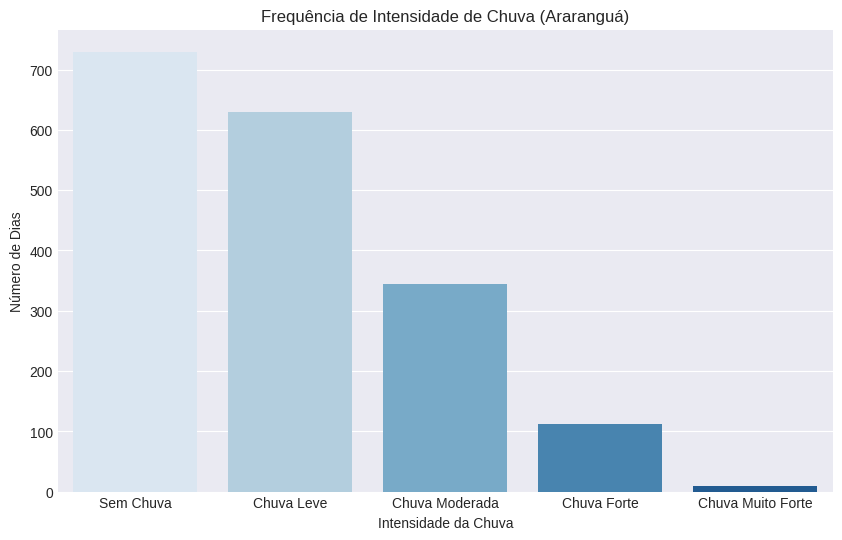

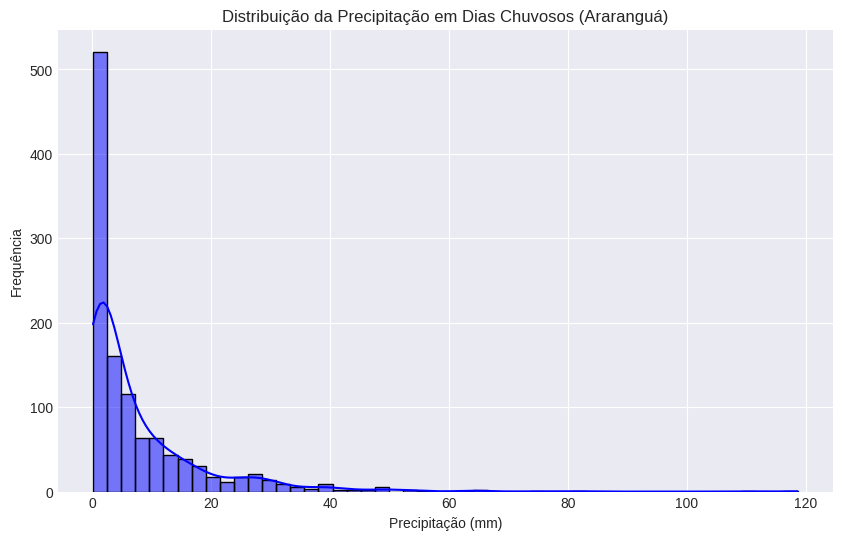


Número médio de dias secos consecutivos: 2.53 dias
Mediana de dias secos consecutivos: 2.00 dias


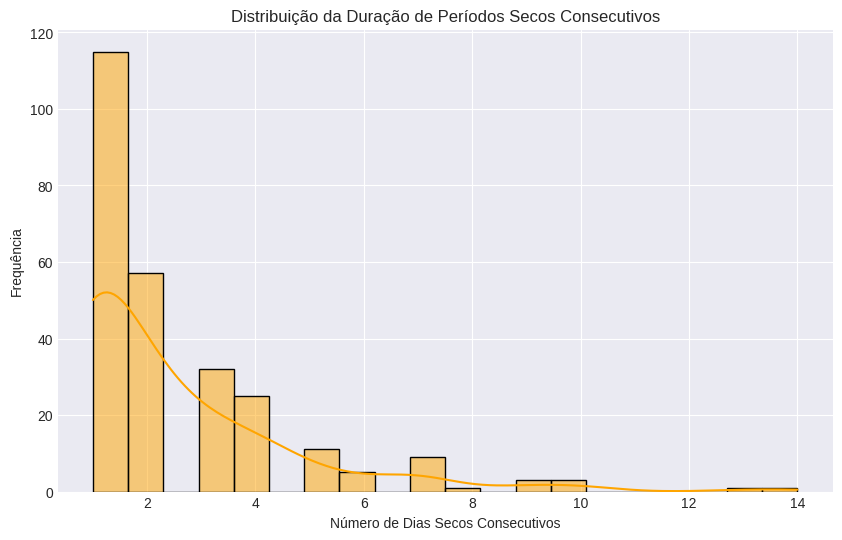

In [ ]:
# Contagem de dias com/sem chuva
dias_sem_chuva = dados[dados['Precipitacao_mm'] == 0].shape[0]
dias_com_chuva = dados[dados['Precipitacao_mm'] > 0].shape[0]
total_dias = dados.shape[0]

print(f"\n--- Frequência de Precipitação ---")
print(f"Total de dias no período: {total_dias}")
print(f"Dias sem chuva (0mm): {dias_sem_chuva} ({dias_sem_chuva/total_dias:.1%})")
print(f"Dias com chuva (>0mm): {dias_com_chuva} ({dias_com_chuva/total_dias:.1%})")

# Categorizar intensidade da chuva (exemplo de limites)
bins_chuva = [-0.1, 0.1, 5, 20, 50, dados['Precipitacao_mm'].max()] # 0mm, 0.1-5mm (leve), 5.1-20mm (moderada), 20.1-50mm (forte), >50mm (muito forte)
labels_chuva = ['Sem Chuva', 'Chuva Leve', 'Chuva Moderada', 'Chuva Forte', 'Chuva Muito Forte']
dados['Intensidade_Chuva'] = pd.cut(dados['Precipitacao_mm'], bins=bins_chuva, labels=labels_chuva, right=True)

print("\nFrequência por Intensidade de Chuva:")
print(dados['Intensidade_Chuva'].value_counts(normalize=True).sort_index())

plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='Intensidade_Chuva', palette='Blues', order=labels_chuva)
plt.title('Frequência de Intensidade de Chuva (Araranguá)')
plt.xlabel('Intensidade da Chuva')
plt.ylabel('Número de Dias')
plt.show()

# Distribuição de precipitação (apenas para dias com chuva)
plt.figure(figsize=(10, 6))
sns.histplot(dados[dados['Precipitacao_mm'] > 0]['Precipitacao_mm'], bins=50, kde=True, color='blue')
plt.title('Distribuição da Precipitação em Dias Chuvosos (Araranguá)')
plt.xlabel('Precipitação (mm)')
plt.ylabel('Frequência')
plt.show()

# Média de dias secos consecutivos
# Reutilizando a lógica de 'grupo_seca' da análise anterior
dados['choveu'] = dados['Precipitacao_mm'] > 0
dados['grupo_seca'] = (dados['choveu'] != dados['choveu'].shift()).cumsum()
seca_series = dados.loc[~dados['choveu'], 'grupo_seca']
if not seca_series.empty:
    duracao_secas = seca_series.value_counts()
    print(f"\nNúmero médio de dias secos consecutivos: {duracao_secas.mean():.2f} dias")
    print(f"Mediana de dias secos consecutivos: {duracao_secas.median():.2f} dias")
    plt.figure(figsize=(10, 6))
    sns.histplot(duracao_secas, bins=20, kde=True, color='orange')
    plt.title('Distribuição da Duração de Períodos Secos Consecutivos')
    plt.xlabel('Número de Dias Secos Consecutivos')
    plt.ylabel('Frequência')
    plt.show()
else:
    print("\nNão há períodos de seca para analisar a duração média.")


--- Variação Anual e Mensal (Box Plots) ---


<ipython-input-9-101664059>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Mes_Nome', y='Temperatura_Media_C', palette='viridis',


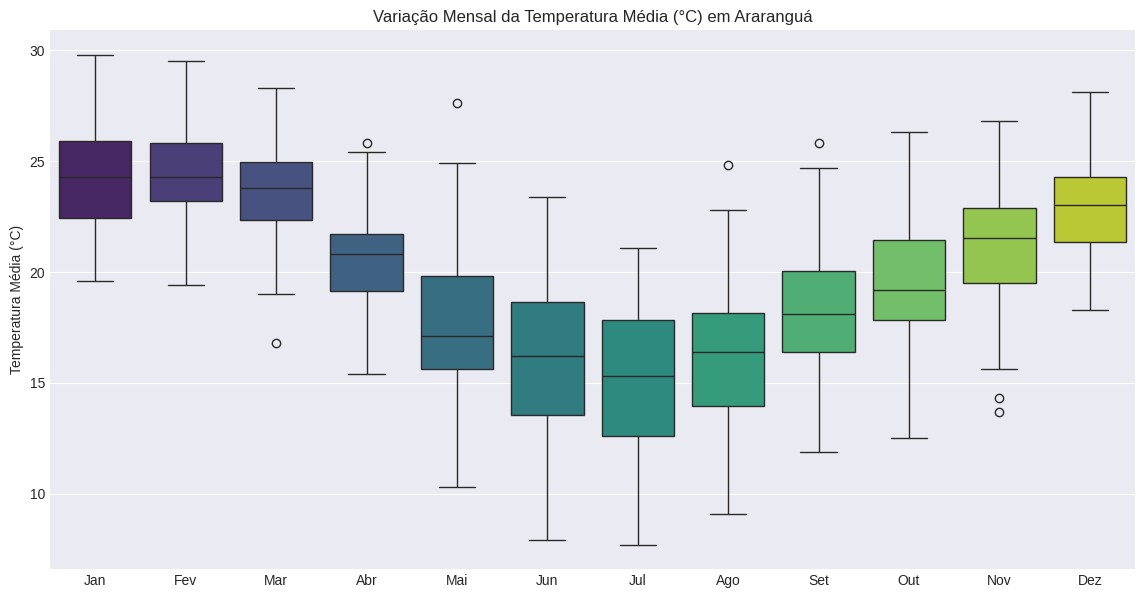

<ipython-input-9-101664059>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Mes_Nome', y='Precipitacao_mm', palette='Blues',


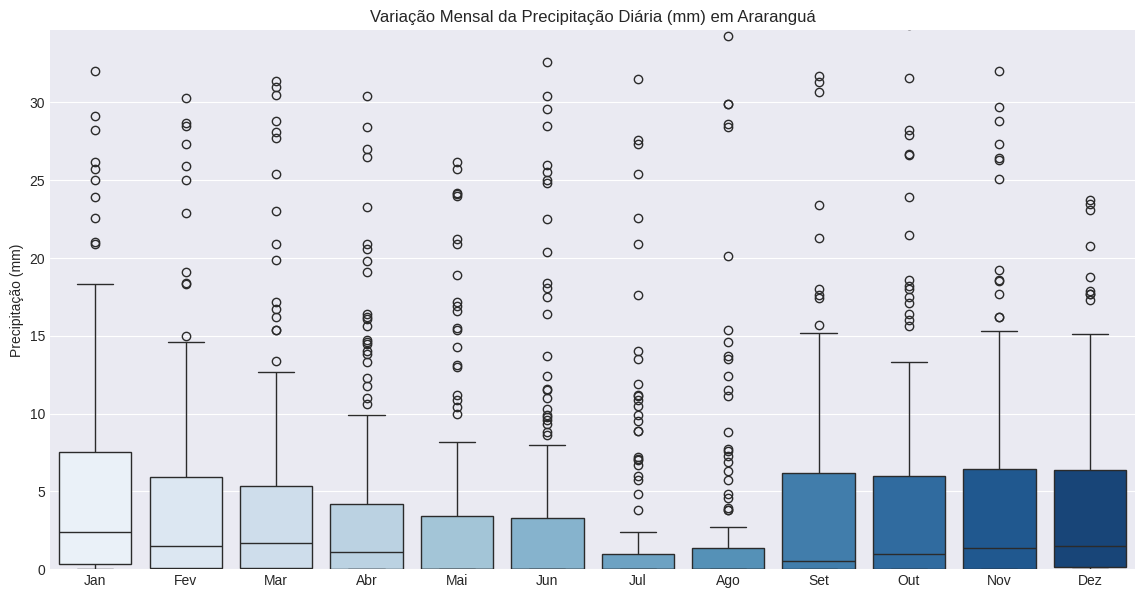

<ipython-input-9-101664059>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Mes_Nome', y='Umidade_Rel_Media_perc', palette='Greens',


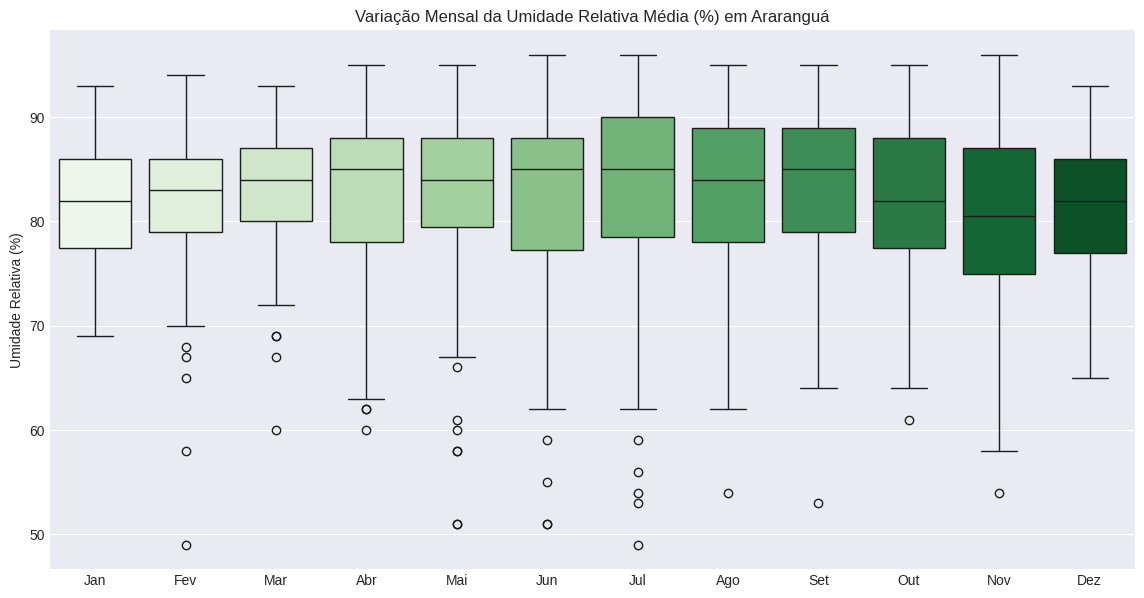

<ipython-input-9-101664059>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Mes_Nome', y='Velocidade_Vento_kmh', palette='Purples',


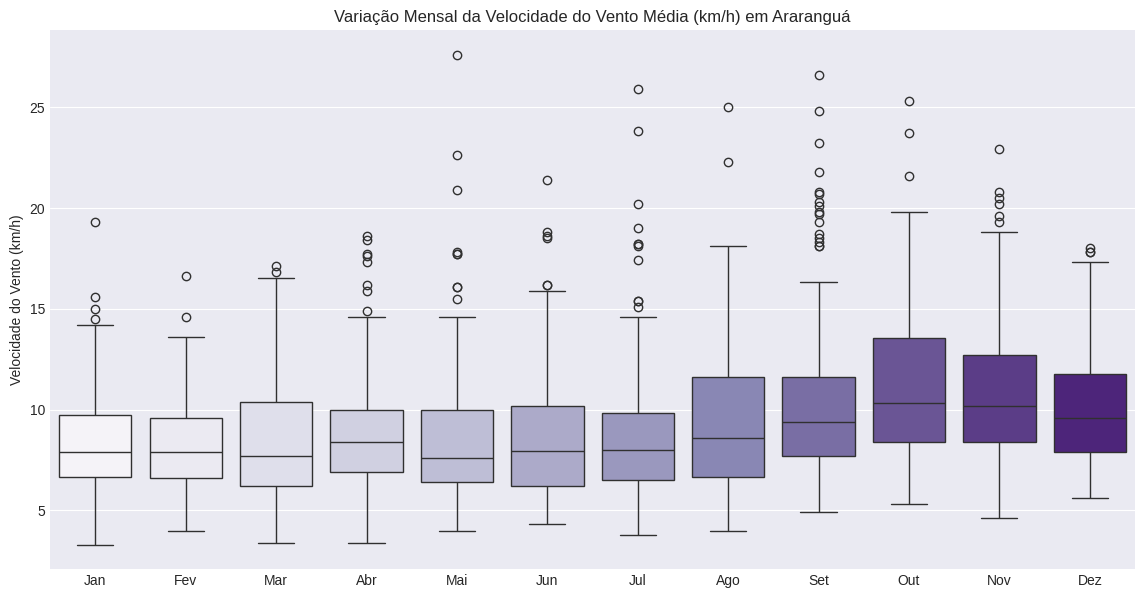


--- Análise da Variabilidade ---

Desvio Padrão Mensal das Variáveis Climáticas:
    Mes  Temp_Media_Std  Precipitacao_Total_Std  Umidade_Media_Std Mes_Nome
0     1        2.206241                8.292772           5.564663      Jan
1     2        1.840125                7.745742           6.435803      Fev
2     3        1.984838                8.473880           5.328049      Mar
3     4        2.145778                7.581811           7.592534      Abr
4     5        3.115001               13.328620           8.259932      Mai
5     6        3.198701               10.608928           9.139887      Jun
6     7        3.281540                9.506111           8.891625      Jul
7     8        3.195085                7.639426           8.047815      Ago
8     9        2.632722                7.899905           7.537777      Set
9    10        2.431609               13.209724           6.950974      Out
10   11        2.640494               10.656355           8.203737      Nov
11   1

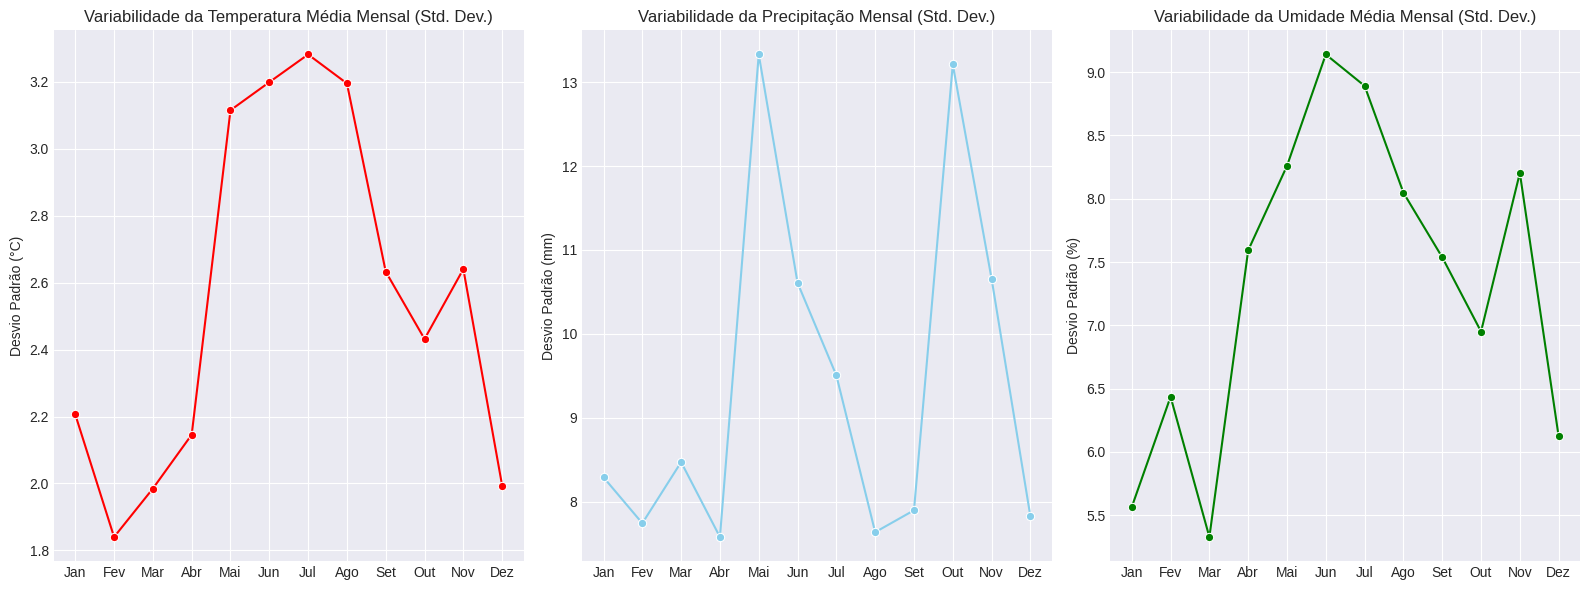


Desvio Padrão Anual das Variáveis Climáticas:
    Ano  Temp_Media_Std_Anual  Precipitacao_Total_Std_Anual  \
0  2020              4.054378                      9.204473   
1  2021              4.050405                      7.548332   
2  2022              4.337564                     10.880871   
3  2023              3.848606                     12.173423   
4  2024              4.182006                      8.188871   
5  2025              3.643285                      7.867877   

   Umidade_Media_Std_Anual  
0                 6.887910  
1                 7.957660  
2                 7.730347  
3                 7.246071  
4                 7.559368  
5                 6.486489  


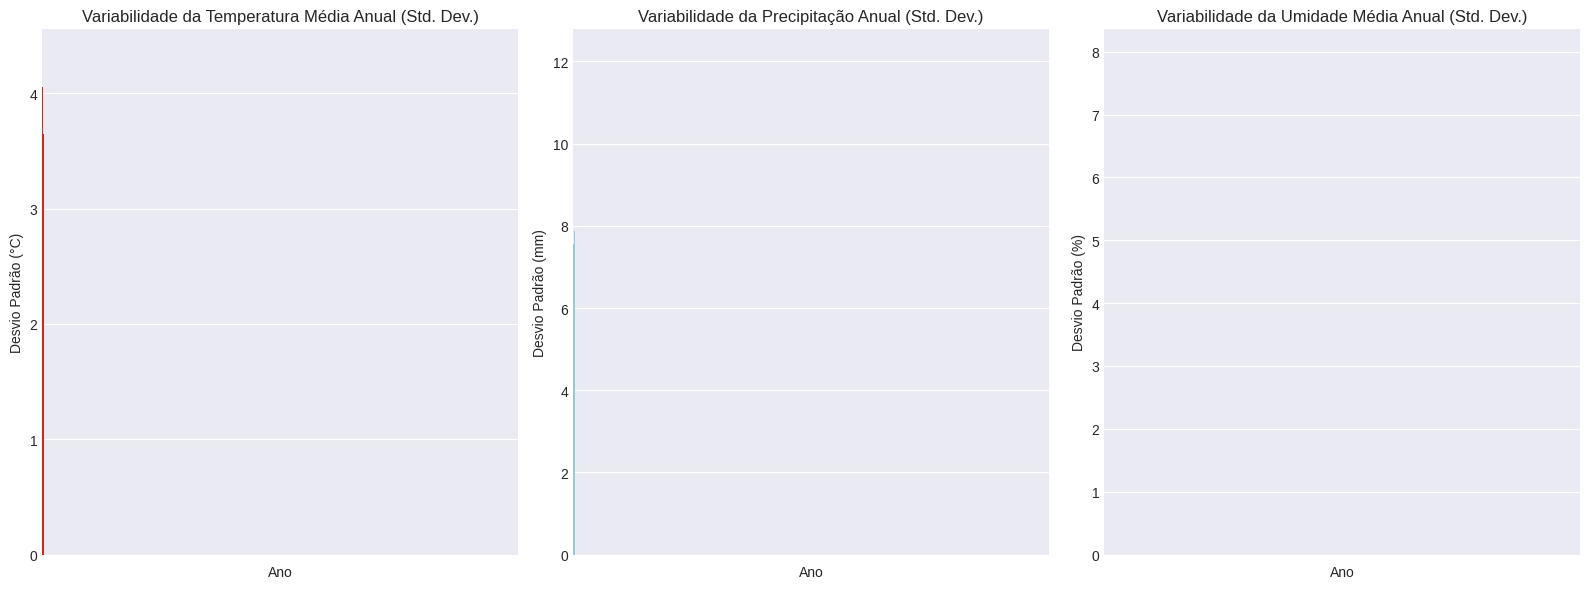


--- Frequência de Dias Chuvosos e Secos ---
Total de dias no período: 1826
Dias secos (0mm de chuva): 665 (36.4%)
Dias chuvosos (>0mm de chuva): 1161 (63.6%)

Percentual de Dias Chuvosos por Mês:
   Mes_Nome  Percentual_Dias_Chuvosos
0       Jan                 84.516129
1       Fev                 77.304965
2       Mar                 77.419355
3       Abr                 69.333333
4       Mai                 45.161290
5       Jun                 44.666667
6       Jul                 40.000000
7       Ago                 43.225806
8       Set                 62.000000
9       Out                 72.258065
10      Nov                 69.333333
11      Dez                 78.709677


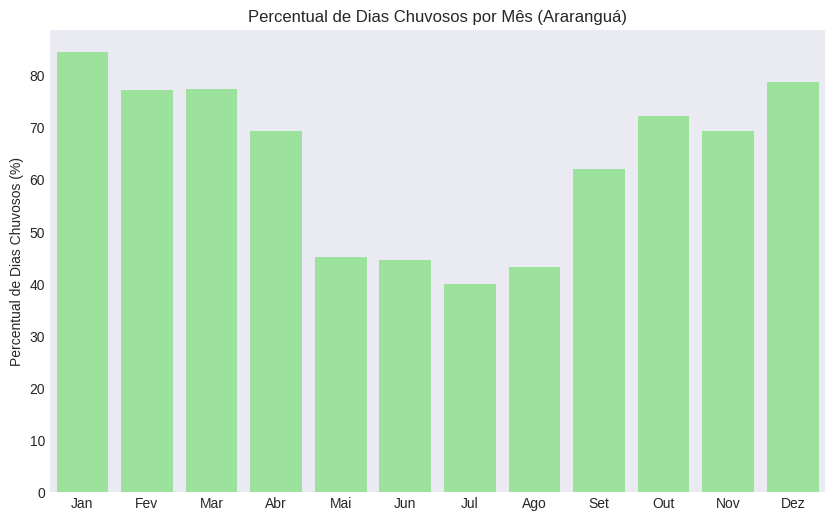


--- Análise da Duração de Períodos Secos ---
Distribuição da Duração dos Períodos Secos (em dias):
count    263.000000
mean       2.528517
std        2.155710
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       14.000000
dtype: float64


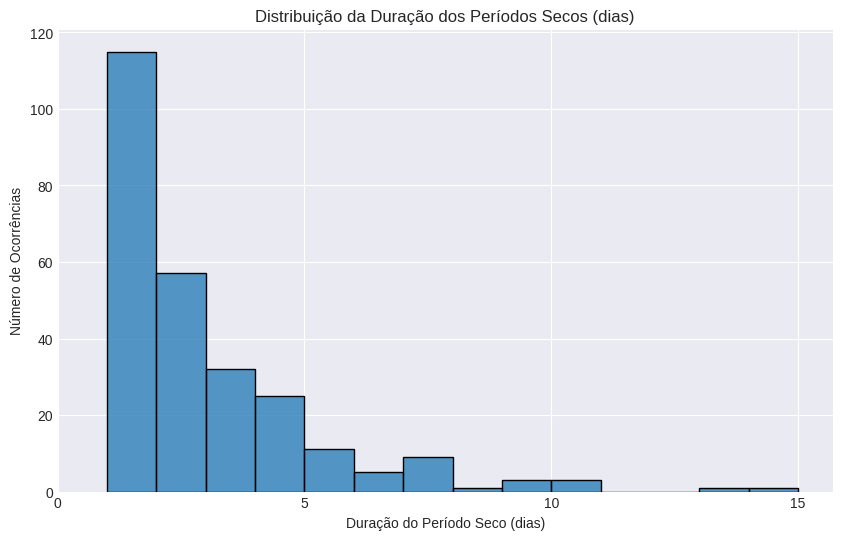


--- Análise da Duração de Períodos Chuvosos ---
Distribuição da Duração dos Períodos Chuvosos (em dias):
count    262.000000
mean       4.431298
std        4.041103
min        1.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       23.000000
dtype: float64


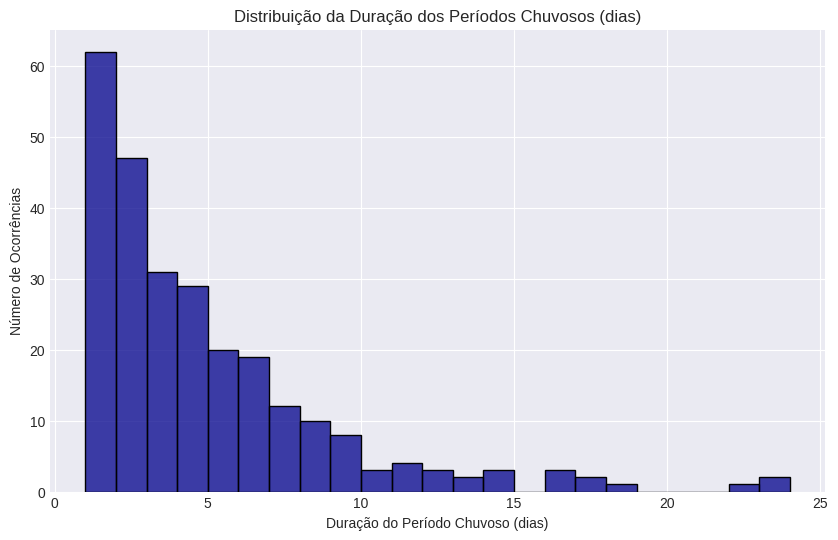


--- Análise de Condições Agrícolas Específicas ---
Total de dias com Estresse por Calor (Temp. Máx. > 35°C): 14 dias
Total de dias com Noite Fria (Temp. Min. < 8°C): 99 dias


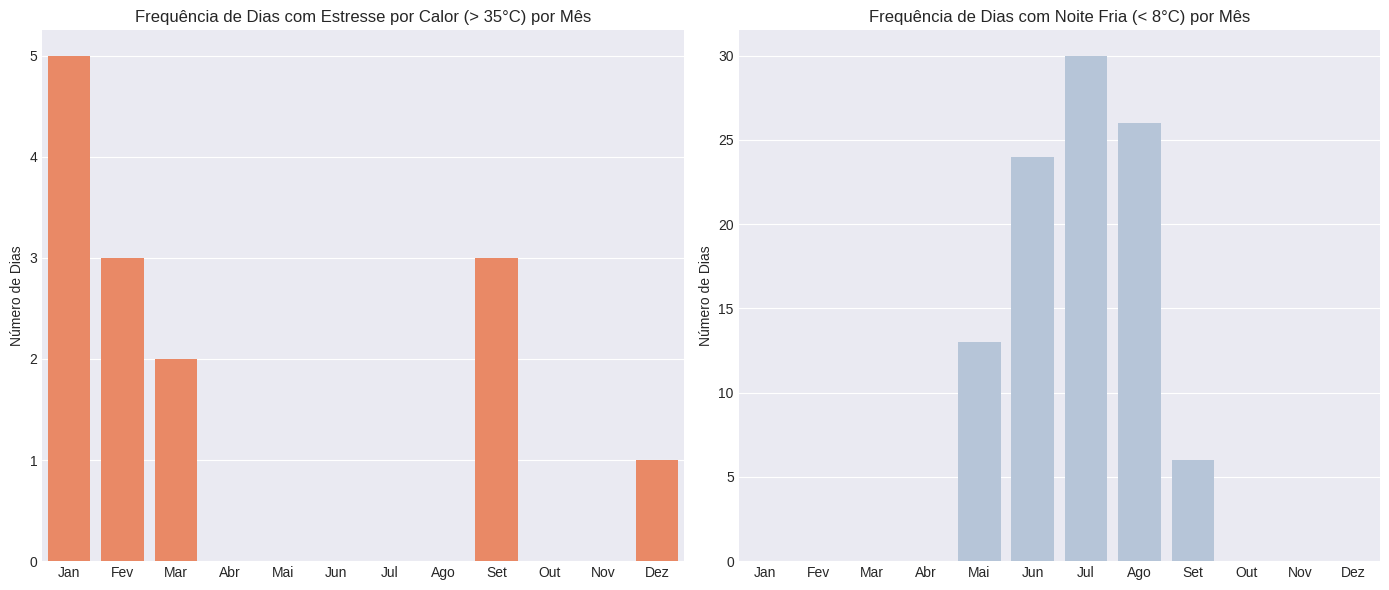


--- Matriz de Correlação das Variáveis Climáticas (Araranguá) ---
                        Temperatura_Media_C  Precipitacao_mm  \
Temperatura_Media_C                1.000000         0.057681   
Precipitacao_mm                    0.057681         1.000000   
Umidade_Rel_Media_perc             0.046002         0.373446   
Velocidade_Vento_kmh              -0.046921         0.034546   

                        Umidade_Rel_Media_perc  Velocidade_Vento_kmh  
Temperatura_Media_C                   0.046002             -0.046921  
Precipitacao_mm                       0.373446              0.034546  
Umidade_Rel_Media_perc                1.000000             -0.401191  
Velocidade_Vento_kmh                 -0.401191              1.000000  


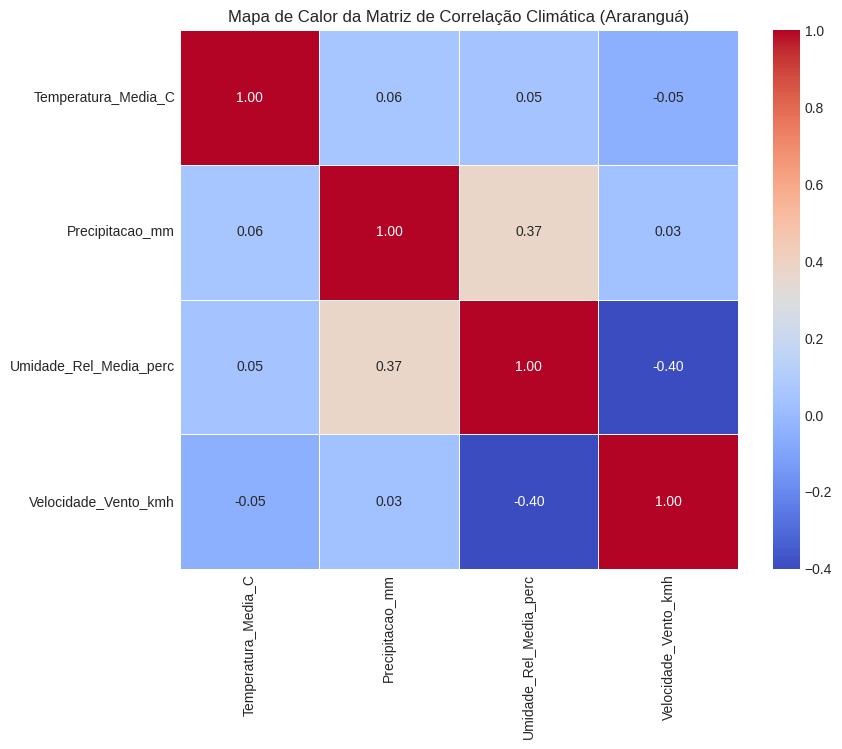

In [ ]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Re-executando a busca de dados para garantir que temos o 'dados' DataFrame
lat, lon = -28.9388, -49.4925 # Coordenadas de Araranguá
end_date = datetime.now().date()
start_date = end_date - timedelta(days=5*365) # Aproximadamente 5 anos

url = (f"https://archive-api.open-meteo.com/v1/archive?"
       f"latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&"
       f"daily=precipitation_sum,temperature_2m_max,temperature_2m_min,temperature_2m_mean,"
       f"relative_humidity_2m_mean,wind_speed_10m_mean&"
       f"timezone=America/Sao_Paulo")

try:
    r = requests.get(url)
    r.raise_for_status()
    data = r.json()
    if 'daily' in data and data['daily']['time']:
        dados = pd.DataFrame({
            'Data': pd.to_datetime(data['daily']['time']),
            'Precipitacao_mm': data['daily']['precipitation_sum'],
            'Temperatura_Max_C': data['daily']['temperature_2m_max'],
            'Temperatura_Min_C': data['daily']['temperature_2m_min'],
            'Temperatura_Media_C': data['daily']['temperature_2m_mean'],
            'Umidade_Rel_Media_perc': data['daily']['relative_humidity_2m_mean'],
            'Velocidade_Vento_kmh': data['daily']['wind_speed_10m_mean']
        })
    else:
        print("Erro: Estrutura de dados 'daily' não encontrada ou vazia.")
        dados = pd.DataFrame()
except requests.exceptions.RequestException as e:
    print(f"Erro ao conectar à API: {e}")
    dados = pd.DataFrame()
except Exception as e:
    print(f"Ocorreu um erro: {e}")
    dados = pd.DataFrame()

if not dados.empty:
    # --- Tratamento de Valores Ausentes ---
    dados['Precipitacao_mm'] = dados['Precipitacao_mm'].fillna(0)
    colunas_para_interpolar = [
        'Temperatura_Max_C', 'Temperatura_Min_C', 'Temperatura_Media_C',
        'Umidade_Rel_Media_perc', 'Velocidade_Vento_kmh'
    ]
    for col in colunas_para_interpolar:
        dados[col] = dados[col].interpolate(method='linear')

    # --- Feature Engineering Essencial (Criação de Colunas de Tempo e Mes_Nome) ---
    dados['Ano'] = dados['Data'].dt.year
    dados['Mes'] = dados['Data'].dt.month
    dados['Dia_da_Semana'] = dados['Data'].dt.day_name() # Adicional, mas útil
    dados['Dia_do_Ano'] = dados['Data'].dt.dayofyear # Adicional

    # Definir os nomes dos meses para mapeamento (importante para os gráficos)
    meses_nomes = {
        1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
        7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
    }
    # Criar a coluna 'Mes_Nome' no DataFrame 'dados' principal
    dados['Mes_Nome'] = dados['Mes'].map(meses_nomes)

    # Definir a ordem dos meses para os gráficos
    ordem_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

    # --- Início das Novas Análises (Box Plots e Variações) ---
    print("\n--- Variação Anual e Mensal (Box Plots) ---")

    # Variação Mensal da Temperatura Média
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=dados, x='Mes_Nome', y='Temperatura_Media_C', palette='viridis',
                order=ordem_meses) # Usar a ordem definida
    plt.title('Variação Mensal da Temperatura Média (°C) em Araranguá')
    plt.ylabel('Temperatura Média (°C)')
    plt.xlabel('')
    plt.show()

    # Variação Mensal da Precipitação
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=dados, x='Mes_Nome', y='Precipitacao_mm', palette='Blues',
                order=ordem_meses)
    plt.title('Variação Mensal da Precipitação Diária (mm) em Araranguá')
    plt.ylabel('Precipitação (mm)')
    plt.xlabel('')
    # Limitar o eixo Y para melhor visualização, ignorando outliers extremos (chuvas muito fortes)
    plt.ylim(0, dados['Precipitacao_mm'].quantile(0.98)) # Corrigido 'Precipitation_mm' para 'Precipitacao_mm'
    plt.show()

    # Variação Mensal da Umidade Relativa Média
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=dados, x='Mes_Nome', y='Umidade_Rel_Media_perc', palette='Greens',
                order=ordem_meses)
    plt.title('Variação Mensal da Umidade Relativa Média (%) em Araranguá')
    plt.ylabel('Umidade Relativa (%)')
    plt.xlabel('')
    plt.show()

    # Variação Mensal da Velocidade do Vento Média
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=dados, x='Mes_Nome', y='Velocidade_Vento_kmh', palette='Purples',
                order=ordem_meses)
    plt.title('Variação Mensal da Velocidade do Vento Média (km/h) em Araranguá')
    plt.ylabel('Velocidade do Vento (km/h)')
    plt.xlabel('')
    plt.show()

    # --- Análise da Variabilidade Interanual e Intermensal (Código anterior, que estava ok) ---
    print("\n--- Análise da Variabilidade ---")

    # Variabilidade Mensal
    df_mensal_std = dados.groupby('Mes').agg(
        Temp_Media_Std=('Temperatura_Media_C', 'std'),
        Precipitacao_Total_Std=('Precipitacao_mm', 'std'),
        Umidade_Media_Std=('Umidade_Rel_Media_perc', 'std')
    ).reset_index()
    df_mensal_std['Mes_Nome'] = df_mensal_std['Mes'].map(meses_nomes)

    print("\nDesvio Padrão Mensal das Variáveis Climáticas:")
    print(df_mensal_std)

    plt.figure(figsize=(16, 6))

    plt.subplot(1, 3, 1)
    # Removido o argumento 'order' do lineplot
    sns.lineplot(data=df_mensal_std, x='Mes_Nome', y='Temp_Media_Std', marker='o', color='red')
    plt.title('Variabilidade da Temperatura Média Mensal (Std. Dev.)')
    plt.ylabel('Desvio Padrão (°C)')
    plt.xlabel('')

    plt.subplot(1, 3, 2)
    # Removido o argumento 'order' do lineplot
    sns.lineplot(data=df_mensal_std, x='Mes_Nome', y='Precipitacao_Total_Std', marker='o', color='skyblue')
    plt.title('Variabilidade da Precipitação Mensal (Std. Dev.)')
    plt.ylabel('Desvio Padrão (mm)')
    plt.xlabel('')

    plt.subplot(1, 3, 3)
    # Removido o argumento 'order' do lineplot
    sns.lineplot(data=df_mensal_std, x='Mes_Nome', y='Umidade_Media_Std', marker='o', color='green')
    plt.title('Variabilidade da Umidade Média Mensal (Std. Dev.)')
    plt.ylabel('Desvio Padrão (%)')
    plt.xlabel('')

    plt.tight_layout()
    plt.show()

    # Variabilidade Anual
    df_anual_std = dados.groupby('Ano').agg(
        Temp_Media_Std_Anual=('Temperatura_Media_C', 'std'),
        Precipitacao_Total_Std_Anual=('Precipitacao_mm', 'std'), # Corrigido aqui também
        Umidade_Media_Std_Anual=('Umidade_Rel_Media_perc', 'std')
    ).reset_index()

    print("\nDesvio Padrão Anual das Variáveis Climáticas:")
    print(df_anual_std)

    plt.figure(figsize=(16, 6))

    plt.subplot(1, 3, 1)
    sns.barplot(data=df_anual_std, x='Ano', y='Temp_Media_Std_Anual', color='red')
    plt.title('Variabilidade da Temperatura Média Anual (Std. Dev.)')
    plt.ylabel('Desvio Padrão (°C)')
    plt.xticks(df_anual_std['Ano'])

    plt.subplot(1, 3, 2)
    sns.barplot(data=df_anual_std, x='Ano', y='Precipitacao_Total_Std_Anual', color='skyblue')
    plt.title('Variabilidade da Precipitação Anual (Std. Dev.)')
    plt.ylabel('Desvio Padrão (mm)')
    plt.xticks(df_anual_std['Ano'])

    plt.subplot(1, 3, 3)
    sns.barplot(data=df_anual_std, x='Ano', y='Umidade_Media_Std_Anual', color='green')
    plt.title('Variabilidade da Umidade Média Anual (Std. Dev.)')
    plt.ylabel('Desvio Padrão (%)')
    plt.xticks(df_anual_std['Ano'])

    plt.tight_layout()
    plt.show()

    # --- O restante das análises (Frequência de Dias Chuvosos/Secos, Duração, Condições Específicas) ---
    print("\n--- Frequência de Dias Chuvosos e Secos ---")

    # Contagem de dias secos (Precipitação == 0) e chuvosos (Precipitação > 0)
    dias_secos = dados[dados['Precipitacao_mm'] == 0].shape[0]
    dias_chuvosos = dados[dados['Precipitacao_mm'] > 0].shape[0]
    total_dias = dados.shape[0]

    print(f"Total de dias no período: {total_dias}")
    print(f"Dias secos (0mm de chuva): {dias_secos} ({dias_secos/total_dias:.1%})")
    print(f"Dias chuvosos (>0mm de chuva): {dias_chuvosos} ({dias_chuvosos/total_dias:.1%})")

    # Frequência mensal de dias chuvosos
    dados['Dia_Chuvoso'] = dados['Precipitacao_mm'] > 0
    frequencia_chuva_mensal = dados.groupby('Mes').agg(
        Percentual_Dias_Chuvosos=('Dia_Chuvoso', lambda x: (x.sum() / len(x)) * 100)
    ).reset_index()
    frequencia_chuva_mensal['Mes_Nome'] = frequencia_chuva_mensal['Mes'].map(meses_nomes)


    print("\nPercentual de Dias Chuvosos por Mês:")
    print(frequencia_chuva_mensal[['Mes_Nome', 'Percentual_Dias_Chuvosos']])

    plt.figure(figsize=(10, 6))
    sns.barplot(data=frequencia_chuva_mensal, x='Mes_Nome', y='Percentual_Dias_Chuvosos', color='lightgreen', order=ordem_meses)
    plt.title('Percentual de Dias Chuvosos por Mês (Araranguá)')
    plt.ylabel('Percentual de Dias Chuvosos (%)')
    plt.xlabel('')
    plt.grid(axis='y')
    plt.show()

    print("\n--- Análise da Duração de Períodos Secos ---")

    # Recalculando os grupos de seca para ter certeza
    dados['sem_chuva'] = (dados['Precipitacao_mm'] == 0).astype(int)
    dados['grupo_seca_id'] = (dados['sem_chuva'] != dados['sem_chuva'].shift()).cumsum()

    # Filtrar apenas os grupos de seca
    periodos_secos = dados[dados['sem_chuva'] == 1].groupby('grupo_seca_id').size()

    print("Distribuição da Duração dos Períodos Secos (em dias):")
    print(periodos_secos.describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(periodos_secos[periodos_secos > 0], bins=range(1, int(periodos_secos.max()) + 2), kde=False) # Excluir 0 dias de seca
    plt.title('Distribuição da Duração dos Períodos Secos (dias)')
    plt.xlabel('Duração do Período Seco (dias)')
    plt.ylabel('Número de Ocorrências')
    plt.xticks(np.arange(0, periodos_secos.max() + 5, 5))
    plt.show()

    # Análise de períodos consecutivos de chuva
    print("\n--- Análise da Duração de Períodos Chuvosos ---")
    dados['choveu_consecutivamente'] = (dados['Precipitacao_mm'] > 0).astype(int)
    dados['grupo_chuva_id'] = (dados['choveu_consecutivamente'] != dados['choveu_consecutivamente'].shift()).cumsum()

    periodos_chuvosos = dados[dados['choveu_consecutivamente'] == 1].groupby('grupo_chuva_id').size()

    print("Distribuição da Duração dos Períodos Chuvosos (em dias):")
    print(periodos_chuvosos.describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(periodos_chuvosos[periodos_chuvosos > 0], bins=range(1, int(periodos_chuvosos.max()) + 2), kde=False, color='darkblue')
    plt.title('Distribuição da Duração dos Períodos Chuvosos (dias)')
    plt.xlabel('Duração do Período Chuvoso (dias)')
    plt.ylabel('Número de Ocorrências')
    plt.xticks(np.arange(0, periodos_chuvosos.max() + 5, 5))
    plt.show()

    # 4. Análise de Condições Favoráveis/Desfavoráveis Específicas para Arroz
    print("\n--- Análise de Condições Agrícolas Específicas ---")

    # Exemplo: Dias de Estresse por Calor (Temperatura Máxima > 35°C)
    limite_calor_extremo = 35
    dados['Estresse_Calor'] = (dados['Temperatura_Max_C'] > limite_calor_extremo).astype(int)
    dias_estresse_calor = dados['Estresse_Calor'].sum()
    print(f"Total de dias com Estresse por Calor (Temp. Máx. > {limite_calor_extremo}°C): {dias_estresse_calor} dias")

    # Exemplo: Noites Frias (Temperatura Mínima < 8°C - para arroz jovem)
    limite_frio = 8
    dados['Noite_Fria'] = (dados['Temperatura_Min_C'] < limite_frio).astype(int)
    dias_noite_fria = dados['Noite_Fria'].sum()
    print(f"Total de dias com Noite Fria (Temp. Min. < {limite_frio}°C): {dias_noite_fria} dias")

    # Podemos analisar a distribuição mensal dessas condições
    df_condicoes_mensal = dados.groupby('Mes').agg(
        Dias_Estresse_Calor=('Estresse_Calor', 'sum'),
        Dias_Noite_Fria=('Noite_Fria', 'sum')
    ).reset_index()
    df_condicoes_mensal['Mes_Nome'] = df_condicoes_mensal['Mes'].map(meses_nomes)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.barplot(data=df_condicoes_mensal, x='Mes_Nome', y='Dias_Estresse_Calor', color='coral', order=ordem_meses)
    plt.title(f'Frequência de Dias com Estresse por Calor (> {limite_calor_extremo}°C) por Mês')
    plt.ylabel('Número de Dias')
    plt.xlabel('')

    plt.subplot(1, 2, 2)
    sns.barplot(data=df_condicoes_mensal, x='Mes_Nome', y='Dias_Noite_Fria', color='lightsteelblue', order=ordem_meses)
    plt.title(f'Frequência de Dias com Noite Fria (< {limite_frio}°C) por Mês')
    plt.ylabel('Número de Dias')
    plt.xlabel('')

    plt.tight_layout()
    plt.show()

    # 5. Correlação entre variáveis climáticas (heatmap)
    print("\n--- Matriz de Correlação das Variáveis Climáticas (Araranguá) ---")
    correlacao_climatica = dados[['Temperatura_Media_C', 'Precipitacao_mm', 'Umidade_Rel_Media_perc', 'Velocidade_Vento_kmh']].corr() # Corrigido 'Precipitation_mm' para 'Precipitacao_mm'
    print(correlacao_climatica)

    plt.figure(figsize=(9, 7))
    sns.heatmap(correlacao_climatica, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Mapa de Calor da Matriz de Correlação Climática (Araranguá)')
    plt.show()

else:
    print("Não foi possível prosseguir com a EDA pois o DataFrame de dados está vazio.")